# Paramater Assignment

```
Topik
Silakan memilih topik final project antara Regression, Classification atau Clustering. Kalian juga boleh memilih topik mengenai Anomaly Detection, Novelty Detection hingga Dimensionality Reduction. Beberapa contoh kasus dari masing-masing topik adalah sebagai berikut:

Regression: House Pricing, NYC Taxi Fare Prediction, Wallmart Sales in Stormy Weather, dll
Classification: SF Crime Classification, Wallmart Trip Type, Titanic, dll
Clustering: Human Activity Recognition, Credit Card Clustering, Household Electric Consumption, dll
Data Sources
Kalian bisa memilih data dari salah satu repository dibawah ini. Pilih data yang menurut kalian paling nyaman digunakan karena tidak ada batasan untuk memilih data dalam mengerjakan final project.

Popular open data repositories
UC Irvine Machine Learning Repository
Kaggle datasets
Amazon’s AWS datasets
Meta portals (they list open data repositories)
Data Portals
OpenDataMonitor
Quandl
Other pages listing many popular open data repositories
Wikipedia’s list of Machine Learning datasets
Quora.com
The datasets subreddit

Panduan Pengerjaan & Penilaian
Final Project dikerjakan dalam format notebook dengan/atau dengan model deployment (Opsional) dengan beberapa kriteria wajib di bawah ini:

Machine learning framework yang digunakan adalah Scikit-Learn

Ada penggunaan library visualisasi, seperti matplotlib atau seaborn

Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All pada notebook, semua cell berhasil tereksekusi sampai akhir.

Isi notebook harus mengikuti outline di bawah ini:

Pengenalan

Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

Import pustaka yang dibutuhkan

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

Data Loading & Exploratory Data Analysis

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan exploratory data analysis (EDA). Proses EDA harus melibatkan penggunaan library visualisasi. Sebagai contoh, proses EDA bisa saja melakukan visualisasi distribusi kelas pada data, distribusi ukuran gambar (untuk topik CV), atau distribusi panjang kalimat (untuk topik NLP), dan eksplorasi data lain yang dibutuhkan.

Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.

Model Saving

Dengan melihat hasil evaluasi model, pilih model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

Notebook harus diupload dalam akun GitHub masing-masing.

Lakukan model deployment ke Heroku.

Penilaian project dilakukan berdasarkan notebook dan service/API model yang sudah di-deploy (Jika melakukan model deployment).
```

# Pengenalan

## Data Source

Kita akan melakukan peng-cluster-an universitas ke dua grup: Private (Swasta) dan Public (Nasional).

Data source yang digunakan adalah sebagai berikut:

[U.S. News and World Report’s College Data](https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data) - [From the "ISLR" R package](https://rdrr.io/cran/ISLR/man/College.html#heading-5)

```
A. Context

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

B. Content

A data frame with 777 observations on the following 18 variables.

- Private: A factor with levels No and Yes indicating private or public university
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Pct. new students from top 10% of H.S. class
- Top25perc: Pct. new students from top 25% of H.S. class
- F.Undergrad: Number of fulltime undergraduates
- P.Undergrad: Number of parttime undergraduates
- Outstate: Out-of-state tuition
- Room.Board: Room and board costs
- Books: Estimated book costs
- Personal: Estimated personal spending
- PhD: Pct. of faculty with Ph.D.'s
- Terminal: Pct. of faculty with terminal degree
- S.F.Ratio: Student/faculty ratio
- perc.alumni: Pct. alumni who donate
- Expend: Instructional expenditure per student
- Grad.Rate: Graduation rate

C. Original Source

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The dataset was used in the ASA Statistical Graphics Section’s 1995 Data Analysis Exposition.

https://sites.google.com/site/edaachievements/home/raw-data-source
```

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn.externals import joblib
import pickle
warnings.filterwarnings('ignore')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/opt/anaconda/lib/python3.8/site-packages/sklearn/externals/__init__.py)

## Data Loading & Exploratory Data Analysis

### Importing Data

In [2]:
df = pd.read_csv('College.csv')
df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [4]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

Dapat dilihat bahwa tidak ada data dengan parameter kosong / null

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Exploratory Data Analysis


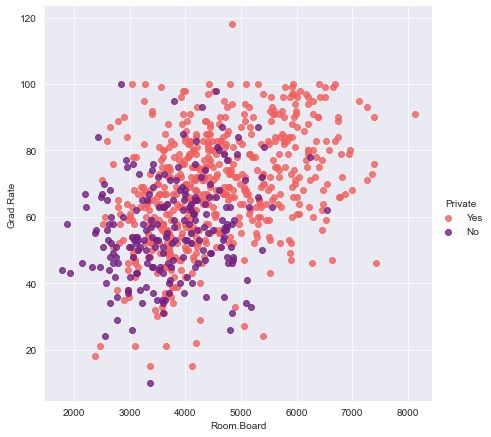

In [6]:
sns.set_style('darkgrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',palette='magma_r',size=6,aspect=1,fit_reg=False)

**scatterplot dari tingkat kelulusan (Grad.Rate) dibandingkan biaya asrama (Room.Board) dimana warna point mengindikasikan status Private (Swasta) atau bukan (Nasional / Public).**

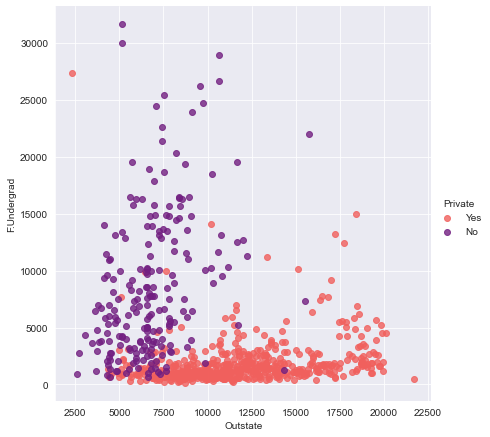

In [7]:
sns.set_style('darkgrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',palette='magma_r',size=6,aspect=1,fit_reg=False)

**scatterplot dari F.Undergrad vs Outstate dimana warna point mengindikasikan status Private (Swasta) atau bukan (Nasional / Public).**

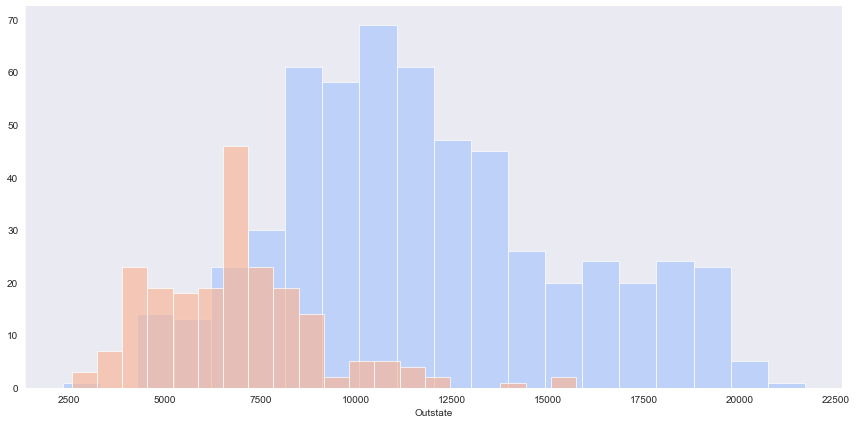

In [8]:
sns.set_style('dark')
h = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
h = h.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Stacked histogram untuk biaya sekolah di luar daerah (Outstate) dimana warna point mengindikasikan status Private (Swasta) atau bukan (Nasional / Public).**

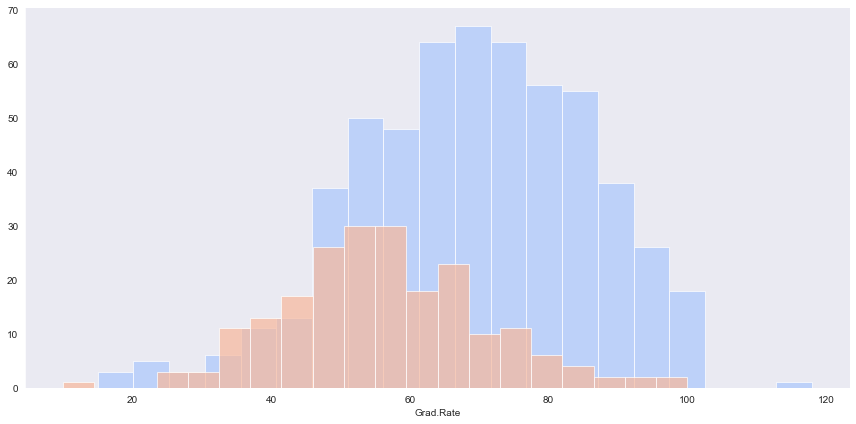

In [9]:
sns.set_style('dark')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**Histogram untuk tingkat kelulusan, dimana warna mengindikasikan status Private (Swasta) atau bukan (Nasional / Public)..**

## Data Preprocessing

*Dapat dilihat kejanggalan data berupa adanya sekolah swasta yang memiliki tinggkat kelulusan di atas 100%*

In [10]:
#### checking for rows with above-100% error 

df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
#### suppress above-100% value at index 95

df.at[95, 'Grad.Rate'] = 100

In [12]:
#### double-check

df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


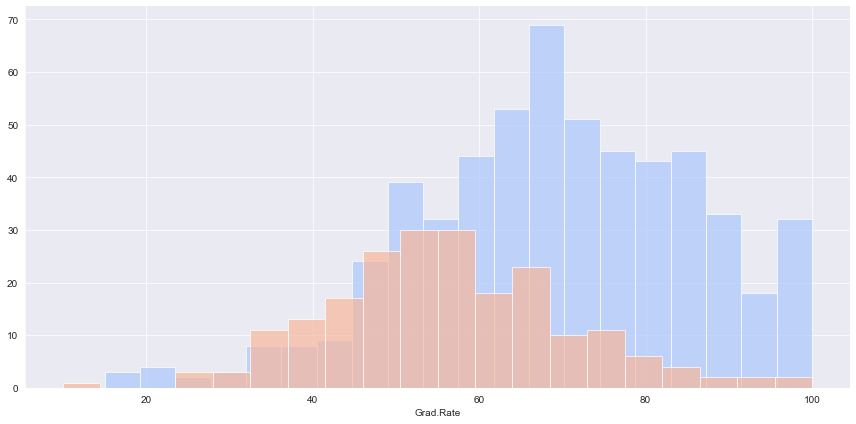

In [13]:
#### double-check with visuals

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

Sebelum menjalankan model K-Means data berisikan string value (Nama universitas di kolom `Unnamed: 0`)

In [14]:
df=df.drop(['Unnamed: 0',],axis=1)

## Pendefinisian Model

**K-Means Clustering** adalah algoritme machine learning unsupervised. K-Means clustering tidak memerlukan training dengan supervisi, sehingga dapat melakakuan klasifikasi tanpa menggunakan data yang ter-label. Setelah data awal ter-analasis, data-data dapat langsung dimasukkan ke grup yang sesuai.

K-Means Clustering cocok digunakan untuk:
-  customer profiling
-  market segmentation
-  computer vision
-  search engines
-  astronomy

Kita menggunakan metode ini karena kita akan melakukan klasifikasi data hingga dapat menjadi cluster terbagi dua: Private & Public

## Pelatihan Model

In [15]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [16]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

**The cluster center vectors for unlabeled data**

In [17]:
means=kmeans.cluster_centers_
print(means)

[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]]


Karena data memiliki label, maka kita dapat menggunakannya untuk melakukan evaluasi cluster.

In [18]:
### Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [19]:
df['Cluster'] = df['Private'].apply(converter)

In [20]:
df.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1


In [21]:
df.Private.value_counts()


Yes    565
No     212
Name: Private, dtype: int64

## Evaluasi Model

**Menggunakan confusion matrix dan classification report untuk mengevaluasi hasil kerja K-Means Clustering tanpa memberikan label**

In [22]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Data memiliki ke-akuratan clustering sampai *78%*.

In [23]:
### fitting process

kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [24]:
### The cluster center vectors for labeled data

means1=kmeans.cluster_centers_
print(means1)

[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01 7.93721973e-01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01 3.14814815e-01]]


**The algorithm is purely using the features to cluster the universities into 2 distinct Clusters. KMeans is useful for clustering un-labeled data.**

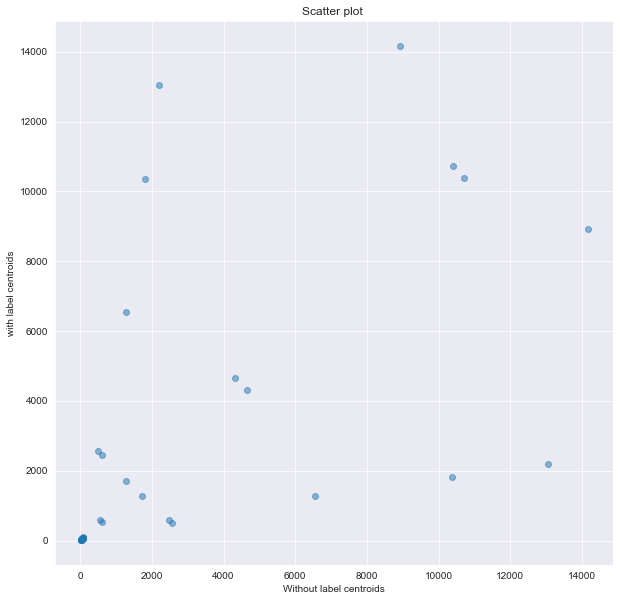

In [25]:
fig = plt.figure(figsize=(10,10))
plt.scatter(means,means1[:, :-1], alpha=0.5)
plt.title('Scatter plot ')
plt.xlabel('Without label centroids')
plt.ylabel('with label centroids')
plt.show()

Text(0.5, 0, 'with Label')

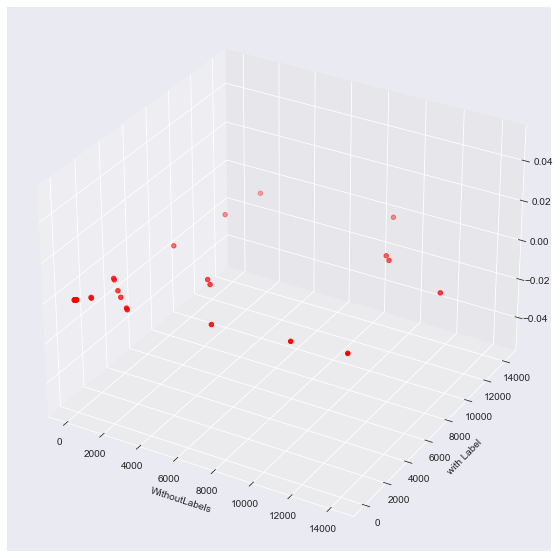

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x =means
y =means1[:, :-1]



ax.scatter(x, y, c='r', marker='o')

ax.set_xlabel('WithoutLabels')
ax.set_ylabel('with Label')

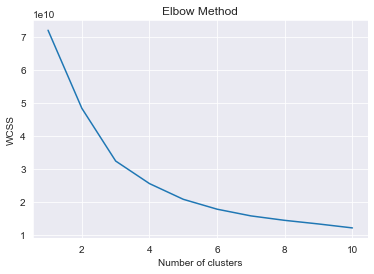

In [27]:
#### WCSS

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.drop('Private',axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4)

In [29]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=4)

In [30]:
kmeans.cluster_centers_

array([[1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01, 8.43373494e-02],
       [2.32830097e+03, 1.58846602e+03, 4.92830097e+02, 3.74417476e+01,
        6.68640777e+01, 1.96334951e+03, 3.04563107e+02, 1.50857718e+04,
        5.18160194e+03, 5.68315534e+02, 1.07616505e+03, 8.20582524e+01,
        8.90000000e+01, 1.17500000e+01, 3.14660194e+01, 1.28801165e+04,
        7.57038835e+01, 9.90291262e-01],
       [1.67567094e+03, 1.20365171e+03, 5.00224359e+02, 2.03482906e+01,
        4.80299145e+01, 2.30697863e+03, 7.04690171e+02, 8.45888889e+03,
        3.96226068e+03, 5.31908120e+02, 1.36355983e+03, 6.56025641e+01,
        7.31324786e+01, 1.50279915e+01, 1.95961538e+01, 7.31216239e+03,
        6.07927350e+01, 7.13675214e-01],
       [9.341

In [31]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[ 76   2 134   0]
 [  7 204 334  20]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      0.36      0.52       212
           1       0.99      0.36      0.53       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.36       777
   macro avg       0.48      0.18      0.26       777
weighted avg       0.97      0.36      0.53       777



In [32]:
kmeans = KMeans(n_clusters=6)

In [33]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=6)

In [34]:
kmeans.cluster_centers_

array([[1.43126374e+03, 1.10152747e+03, 3.76410256e+02, 2.53992674e+01,
        5.36410256e+01, 1.54220513e+03, 4.49468864e+02, 1.16807729e+04,
        4.66511355e+03, 5.36681319e+02, 1.19974359e+03, 6.99084249e+01,
        7.81428571e+01, 1.31388278e+01, 2.56666667e+01, 9.20829670e+03,
        6.95531136e+01, 9.81684982e-01],
       [1.57616667e+04, 1.04965333e+04, 4.01676667e+03, 4.34000000e+01,
        7.63000000e+01, 2.04839333e+04, 3.45553333e+03, 9.24250000e+03,
        4.42580000e+03, 6.06433333e+02, 1.70430000e+03, 8.73666667e+01,
        9.21333333e+01, 1.58966667e+01, 1.82000000e+01, 1.11458333e+04,
        6.74000000e+01, 1.33333333e-01],
       [2.87977064e+03, 1.78230275e+03, 5.42045872e+02, 4.54954128e+01,
        7.49357798e+01, 2.11827523e+03, 2.03522936e+02, 1.67597339e+04,
        5.33963303e+03, 5.76715596e+02, 1.00166055e+03, 8.64770642e+01,
        9.27247706e+01, 1.08165138e+01, 3.51467890e+01, 1.52238257e+04,
        7.88532110e+01, 9.90825688e-01],
       [9.171

In [35]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[  5  26   1   0  97  83]
 [268   4 108  19   9 157]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.02      0.02      0.02       212
           1       0.13      0.01      0.01       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.01       777
   macro avg       0.03      0.01      0.01       777
weighted avg       0.10      0.01      0.02       777



In [36]:
pickle.dump(kmeans, open('model_classifier.pkl','wb'))

In [ ]:
loaded_model = joblib.load('best_model.pkl')